### Image Processing in Python
#### PROBLEM : Design an Image processing class which can perform following Image processing application
<ul>
<li>Image smoothening</li>
<li>Laplace Edge Detection</li>
<li>Sobel Edge Detection</li>
<li>Image Enhancement</li>
</ul>

#### Methods to build
<ul>
<li>Convolution</li>
<li>Normalization</li>
<li>Image addition</li>

<li>Image smoothening</li>
<li>Laplace Edge Detection</li>
<li>Sobel Edge Detection</li>
<li>Image Enhancement</li>
    
<li>Display</li>
<li>Save</li>
</ul>

### Mandatory Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import *
from skimage import io, color
from skimage.measure import compare_psnr, compare_ssim

### Let's Start

In [5]:
img = io.imread('Images/cameraman512.jpg')
img = img_as_ubyte(color.rgb2gray(img)) 

In [11]:
img

array([[146, 153, 161, ..., 153, 153, 154],
       [156, 157, 159, ..., 153, 153, 154],
       [160, 155, 152, ..., 153, 153, 154],
       ...,
       [120, 122, 123, ..., 117, 115, 104],
       [123, 121, 121, ..., 117, 116, 106],
       [121, 119, 122, ..., 116, 116, 108]], dtype=uint8)

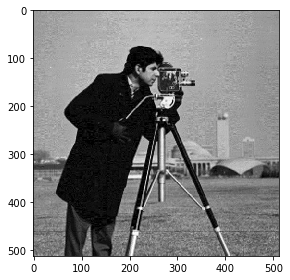

In [7]:
io.imshow(img)

#### Load Image

In [9]:
class imageProcessing:
    def __init__(self, image_path):   
        img = io.imread(image_path)    # Load the image
        self.img = img_as_ubyte(color.rgb2gray(img))      # Convert the image to grayscale (1 channel)
        self.img_shape = (len(self.img),len(self.img[0]))

#### Kernel Definition

#### Convolution

In [10]:
class imageProcessing:
    def __init__(self, image_path):
        
        img = io.imread(image_path)    # Load the image
        self.img = img_as_ubyte(color.rgb2gray(img))      # Convert the image to grayscale (1 channel)
        self.img_shape = (len(self.img),len(self.img[0]))
        
        self.kernelmean = np.array([np.array([1,1,1]), np.array([1,1,1]), np.array([1,1,1])])

In [11]:
class imageProcessing:
    def __init__(self, image_path):
        
        img = io.imread(image_path)    # Load the image
        self.img = img_as_ubyte(color.rgb2gray(img))      # Convert the image to grayscale (1 channel)
        self.img_shape = (len(self.img),len(self.img[0]))
        
        self.kernelmean = np.array([np.array([1,1,1]), np.array([1,1,1]), np.array([1,1,1])])
        
    def convolve2d(self,image, kernel):
        
        output = np.zeros_like(image).astype('int')  # convolution output
       
        # Add zero padding to the input image
        image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
        image_padded[1:-1, 1:-1] = image
        
        for x in range(image.shape[1]):     # Loop over every pixel of the image
            for y in range(image.shape[0]):
                # element-wise multiplication of the kernel and the image
                output[y,x]=(kernel *  image_padded[y:y+3,x:x+3]).sum()      

        return output

#### Normalize

In [16]:
class imageProcessing:
    def __init__(self, image_path):
        
        img = io.imread(image_path)    # Load the image
        self.img = img_as_ubyte(color.rgb2gray(img))      # Convert the image to grayscale (1 channel)
        self.img_shape = (len(self.img),len(self.img[0]))
        
        self.kernelmean = np.array([np.array([1,1,1]), np.array([1,1,1]), np.array([1,1,1])])
        
    def convolve2d(self,image, kernel):
        
        output = np.zeros_like(image).astype('int')  # convolution output
       
        # Add zero padding to the input image
        image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
        image_padded[1:-1, 1:-1] = image
        
        for x in range(image.shape[1]):     # Loop over every pixel of the image
            for y in range(image.shape[0]):
                # element-wise multiplication of the kernel and the image
                output[y,x]=(kernel *  image_padded[y:y+3,x:x+3]).sum()      

        return output
    
    def normalize(self,conv):
        norm =  ((conv - min(conv.flatten())) / (max(conv.flatten()) - min(conv.flatten()) ))*255
        np.clip(norm, 0, 255, out=norm)
        norm = np.uint8(norm)
        return norm

#### Mean Filter

In [16]:
class imageProcessing:
    def __init__(self, image_path):
        
        img = io.imread(image_path)    # Load the image
        self.img = img_as_ubyte(color.rgb2gray(img))      # Convert the image to grayscale (1 channel)
        self.img_shape = (len(self.img),len(self.img[0]))
        
        self.kernelmean = np.array([np.array([1,1,1]), np.array([1,1,1]), np.array([1,1,1])])
        
    def convolve2d(self,image, kernel):
        
        output = np.zeros_like(image).astype('int')  # convolution output
       
        # Add zero padding to the input image
        image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
        image_padded[1:-1, 1:-1] = image
        
        for x in range(image.shape[1]):     # Loop over every pixel of the image
            for y in range(image.shape[0]):
                # element-wise multiplication of the kernel and the image
                output[y,x]=(kernel *  image_padded[y:y+3,x:x+3]).sum()      

        return output
    
    def normalize(self,conv):
        norm =  ((conv - min(conv.flatten())) / (max(conv.flatten()) - min(conv.flatten()) ))*255
        np.clip(norm, 0, 255, out=norm)
        norm = np.uint8(norm)
        return norm
    
    def mean(self):
        blur = self.convolve2d(self.img, self.kernelmean)/9
        blur = self.normalize(blur)
        return blur

#### Display and Save

In [13]:
class imageProcessing:
    def __init__(self, image_path):
        
        img = io.imread(image_path)    # Load the image
        self.img = img_as_ubyte(color.rgb2gray(img))      # Convert the image to grayscale (1 channel)
        self.img_shape = (len(self.img),len(self.img[0]))
        
        self.kernelmean = np.array([np.array([1,1,1]), np.array([1,1,1]), np.array([1,1,1])])
        
    def convolve2d(self,image, kernel):
        
        output = np.zeros_like(image).astype('int')  # convolution output
       
        # Add zero padding to the input image
        image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
        image_padded[1:-1, 1:-1] = image
        
        for x in range(image.shape[1]):     # Loop over every pixel of the image
            for y in range(image.shape[0]):
                # element-wise multiplication of the kernel and the image
                output[y,x]=(kernel *  image_padded[y:y+3,x:x+3]).sum()      

        return output
    
    def normalize(self,conv):
        norm =  ((conv - min(conv.flatten())) / (max(conv.flatten()) - min(conv.flatten()) ))*255
        np.clip(norm, 0, 255, out=norm)
        norm = np.uint8(norm)
        return norm
    
    def mean(self):
        blur = self.convolve2d(self.img, self.kernelmean)/9
        blur = self.normalize(blur)
        return blur
    
    def display(self,img):
        plt.imshow(img, cmap=plt.cm.gray)
        plt.axis('off')
        plt.show()
        
    def save(self,img,img_path):
        io.imsave(img_path,img)

In [14]:
cam = imageProcessing(image_path='Images/cameraman512.jpg')
man = imageProcessing(image_path='Images/mandrill.tiff')
lena = imageProcessing(image_path='Images/lena_gray.jpg')

In [17]:
mean = cam.mean()

In [16]:
cam.img

array([[146, 153, 161, ..., 153, 153, 154],
       [156, 157, 159, ..., 153, 153, 154],
       [160, 155, 152, ..., 153, 153, 154],
       ...,
       [120, 122, 123, ..., 117, 115, 104],
       [123, 121, 121, ..., 117, 116, 106],
       [121, 119, 122, ..., 116, 116, 108]], dtype=uint8)

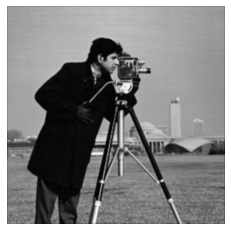

In [18]:
cam.display(mean)

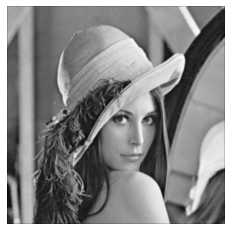

In [19]:
lena.display(lena.mean())

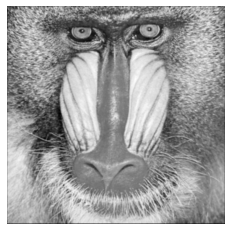

In [20]:
man.display(man.mean())

#### Add other Image Processing Application

#### Laplace

In [21]:
class imageProcessing:
    def __init__(self, image_path):
        
        img = io.imread(image_path)    # Load the image
        self.img = img_as_ubyte(color.rgb2gray(img))      # Convert the image to grayscale (1 channel)
        self.img_shape = (len(self.img),len(self.img[0]))
        
        self.kernelmean = np.array([np.array([1,1,1]), np.array([1,1,1]), np.array([1,1,1])])
        self.kernellap = [[0,-1,0], [-1,4,-1],[0,-1,0]]
        
    def convolve2d(self,image, kernel):
        
        output = np.zeros_like(image).astype('int')  # convolution output
       
        # Add zero padding to the input image
        image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
        image_padded[1:-1, 1:-1] = image
        
        for x in range(image.shape[1]):     # Loop over every pixel of the image
            for y in range(image.shape[0]):
                # element-wise multiplication of the kernel and the image
                output[y,x]=(kernel *  image_padded[y:y+3,x:x+3]).sum()      

        return output
    
    def normalize(self,conv):
        norm =  ((conv - min(conv.flatten())) / (max(conv.flatten()) - min(conv.flatten()) ))*255
        np.clip(norm, 0, 255, out=norm)
        norm = np.uint8(norm)
        return norm
    
    def mean(self):
        blur = self.convolve2d(self.img, self.kernelmean)/9
        blur = self.normalize(blur)
        return blur
    
    def laplace(self):
        lap = self.convolve2d(self.img, self.kernellap)
        lap = self.normalize(lap)
        return lap
    
    def display(self,img):
        plt.imshow(img, cmap=plt.cm.gray)
        plt.axis('off')
        plt.show()
        
    def save(self,img,img_path):
        io.imsave(img_path,img)

In [22]:
cam = imageProcessing(image_path='Images/cameraman512.jpg')
man = imageProcessing(image_path='Images/mandrill.tiff')

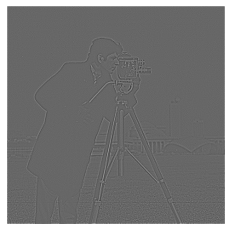

In [23]:
cam.display(cam.laplace())

#### Sobel

In [24]:
class imageProcessing:
    def __init__(self, image_path):
        
        img = io.imread(image_path)    # Load the image
        self.img = img_as_ubyte(color.rgb2gray(img))      # Convert the image to grayscale (1 channel)
        self.img_shape = (len(self.img),len(self.img[0]))
        
        self.kernelmean = np.array([np.array([1,1,1]), np.array([1,1,1]), np.array([1,1,1])])
        self.kernellap = [[0,-1,0], [-1,4,-1],[0,-1,0]]
        self.kernelsobelx = np.array([[-1, 0, 1], [-2,0,2], [-1,0,1]])
        self.kernelsobely = np.array([[-1, -2, -1], [0,0,0], [1,2,1]])
        
    def convolve2d(self,image, kernel):
        
        output = np.zeros_like(image).astype('int')  # convolution output
       
        # Add zero padding to the input image
        image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
        image_padded[1:-1, 1:-1] = image
        
        for x in range(image.shape[1]):     # Loop over every pixel of the image
            for y in range(image.shape[0]):
                # element-wise multiplication of the kernel and the image
                output[y,x]=(kernel *  image_padded[y:y+3,x:x+3]).sum()      

        return output
    
    def normalize(self,conv):
        norm =  ((conv - min(conv.flatten())) / (max(conv.flatten()) - min(conv.flatten()) ))*255
        np.clip(norm, 0, 255, out=norm)
        norm = np.uint8(norm)
        return norm
    
    def mean(self):
        blur = self.convolve2d(self.img, self.kernelmean)/9
        blur = self.normalize(blur)
        return blur
    
    def laplace(self):
        lap = self.convolve2d(self.img, self.kernellap)
        lap = self.normalize(lap)
        return lap
    
    def sobel(self):
        conv1 = self.convolve2d(self.img, self.kernelsobelx)
        conv2 = self.convolve2d(self.img, self.kernelsobely)
        conv = np.sqrt(np.square(conv1) +  np.square(conv2))
        sob = self.normalize(conv)
        return sob
    
    def display(self,img):
        plt.imshow(img, cmap=plt.cm.gray)
        plt.axis('off')
        plt.show()
        
    def save(self,img,img_path):
        io.imsave(img_path,img)

In [25]:
cam = imageProcessing(image_path='Images/cameraman512.jpg')
man = imageProcessing(image_path='Images/mandrill.tiff')

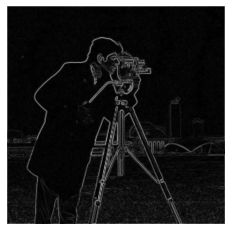

In [26]:
cam.display(cam.sobel())

#### Image Enhancement

In [27]:
class imageProcessing:
    def __init__(self, image_path):
        
        img = io.imread(image_path)    # Load the image
        self.img = img_as_ubyte(color.rgb2gray(img))      # Convert the image to grayscale (1 channel)
        self.img_shape = (len(self.img),len(self.img[0]))
        
        self.kernelmean = np.array([np.array([1,1,1]), np.array([1,1,1]), np.array([1,1,1])])
        self.kernellap = [[0,-1,0], [-1,4,-1],[0,-1,0]]
        self.kernelsobelx = np.array([[-1, 0, 1], [-2,0,2], [-1,0,1]])
        self.kernelsobely = np.array([[-1, -2, -1], [0,0,0], [1,2,1]])
        self.kernelgauss = np.array([np.array([1,2,1]), np.array([2,4,2]), np.array([1,2,1])])
        self.kernelsharp = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
        
    def convolve2d(self,image, kernel):
        
        output = np.zeros_like(image).astype('int')  # convolution output
       
        # Add zero padding to the input image
        image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
        image_padded[1:-1, 1:-1] = image
        
        for x in range(image.shape[1]):     # Loop over every pixel of the image
            for y in range(image.shape[0]):
                # element-wise multiplication of the kernel and the image
                output[y,x]=(kernel *  image_padded[y:y+3,x:x+3]).sum()      

        return output
    
    def normalize(self,conv):
        norm =  ((conv - min(conv.flatten())) / (max(conv.flatten()) - min(conv.flatten()) ))*255
        np.clip(norm, 0, 255, out=norm)
        norm = np.uint8(norm)
        return norm
    
    def mean(self):
        blur = self.convolve2d(self.img, self.kernelmean)/9
        blur = self.normalize(blur)
        return blur
    
    def laplace(self):
        lap = self.convolve2d(self.img, self.kernellap)
        lap = self.normalize(lap)
        return lap
    
    def sobel(self):
        conv1 = self.convolve2d(self.img, self.kernelsobelx)
        conv2 = self.convolve2d(self.img, self.kernelsobely)
        conv = np.sqrt(np.square(conv1) +  np.square(conv2))
        sob = self.normalize(conv)
        return sob
    
    def image_add(self,img1,img2):
        imgadd = img1 + img2
        return imgadd
    
    def enhance(self):
        blur = self.convolve2d(self.img, self.kernelgauss) / 16
        conv = self.convolve2d(blur, self.kernelsharp)
        enhan = self.image_add(np.abs(conv) , self.img)
        enhan = self.normalize(enhan)
        return enhan
    
    def display(self,img):
        plt.imshow(img, cmap=plt.cm.gray)
        plt.axis('off')
        plt.show()
        
    def save(self,img,img_path):
        io.imsave(img_path,img)

In [28]:
cam = imageProcessing(image_path='Images/cameraman512.jpg')
man = imageProcessing(image_path='Images/mandrill.tiff')

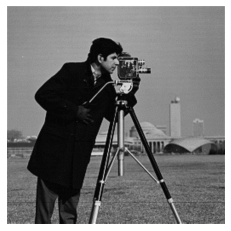

In [29]:
cam.display(cam.enhance())

### Image Processing class

In [30]:
class imageProcessing:
    def __init__(self, image_path):
        
        img = io.imread(image_path)    # Load the image
        self.img = img_as_ubyte(color.rgb2gray(img))      # Convert the image to grayscale (1 channel)
        self.img_shape = (len(self.img),len(self.img[0]))
        
        self.kernelmean = np.array([np.array([1,1,1]), np.array([1,1,1]), np.array([1,1,1])])
        self.kernellap = [[0,-1,0], [-1,4,-1],[0,-1,0]]
        self.kernelsobelx = np.array([[-1, 0, 1], [-2,0,2], [-1,0,1]])
        self.kernelsobely = np.array([[-1, -2, -1], [0,0,0], [1,2,1]])
        self.kernelgauss = np.array([np.array([1,2,1]), np.array([2,4,2]), np.array([1,2,1])])
        self.kernelsharp = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
        
    def convolve2d(self,image, kernel):
        
        output = np.zeros_like(image).astype('int')  # convolution output
       
        # Add zero padding to the input image
        image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
        image_padded[1:-1, 1:-1] = image
        
        for x in range(image.shape[1]):     # Loop over every pixel of the image
            for y in range(image.shape[0]):
                # element-wise multiplication of the kernel and the image
                output[y,x]=(kernel *  image_padded[y:y+3,x:x+3]).sum()      

        return output
    
    def normalize(self,conv):
        norm =  ((conv - min(conv.flatten())) / (max(conv.flatten()) - min(conv.flatten()) ))*255
        np.clip(norm, 0, 255, out=norm)
        norm = np.uint8(norm)
        return norm
    
    def mean(self):
        blur = self.convolve2d(self.img, self.kernelmean)/9
        blur = self.normalize(blur)
        return blur
    
    def laplace(self):
        lap = self.convolve2d(self.img, self.kernellap)
        lap = self.normalize(lap)
        return lap
    
    def sobel(self):
        conv1 = self.convolve2d(self.img, self.kernelsobelx)
        conv2 = self.convolve2d(self.img, self.kernelsobely)
        conv = np.sqrt(np.square(conv1) +  np.square(conv2))
        sob = self.normalize(conv)
        return sob
    
    def image_add(self,img1,img2):
        imgadd = img1 + img2
        return imgadd
    
    def enhance(self):
        blur = self.convolve2d(self.img, self.kernelgauss) / 16
        conv = self.convolve2d(blur, self.kernelsharp)
        enhan = self.image_add(np.abs(conv) , self.img)
        enhan = self.normalize(enhan)
        return enhan
    
    def display(self,img):
        plt.imshow(img, cmap=plt.cm.gray)
        plt.axis('off')
        plt.show()
        
    def save(self,img,img_path):
        io.imsave(img_path,img)

In [31]:
cam = imageProcessing(image_path='Images/cameraman512.jpg')
man = imageProcessing(image_path='Images/mandrill.tiff')

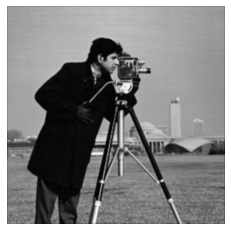

In [32]:
cam.display(cam.mean())

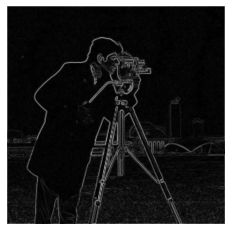

In [33]:
cam.display(cam.sobel())

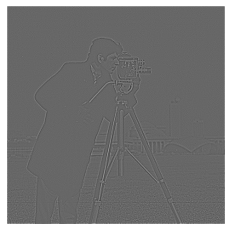

In [34]:
cam.display(cam.laplace())

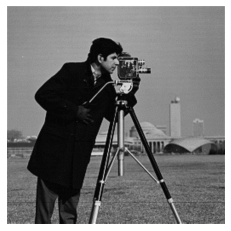

In [35]:
cam.display(cam.enhance())

In [36]:
cam.save(cam.enhance(),'Images/EnhancedImage.jpg')